#### MIT License (c) 2019 by Andrew Lyasoff

#### Jupyter notebook written in Python 3. It illustrates the derivation of the Black-Scholes-Merton formula for the price of an European style call option by using SymPy. In particular, it illustrates the inversion of a function by using 'solve.' The formula is derived with non-zero dividends.

In [1]:
from sympy import *
t=Symbol('t',positive=True)
r=Symbol('r',positive=True)
S=Symbol('S',positive=True)
K=Symbol('K',positive=True)
a=Symbol('a',positive=True)
x=Symbol('x',real=True)
sigma=Symbol('sigma',positive=True)
delta=Symbol('delta',positive=True)
init_printing()

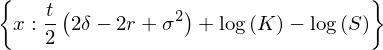

In [2]:
ibound=solve(S*exp(x+(r-delta-Rational(1,2)*sigma**2)*t)-K,x,dict=True)[0]
ibound

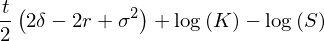

In [3]:
ibound[x]

In [4]:
integrate(exp(-x**2/(2*t*sigma**2))/(sigma*sqrt(2*pi*t)),(x,-oo,+oo))

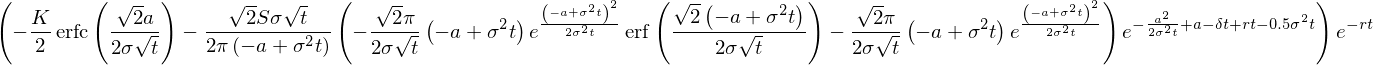

In [5]:
A=exp(-r*t)*integrate(exp(-x**2/(2*t*sigma**2))*(S*exp(x+(r-delta-(1/2)*sigma**2)*t)-K)/(sigma*sqrt(2*pi*t)),(x,a,+oo))
A

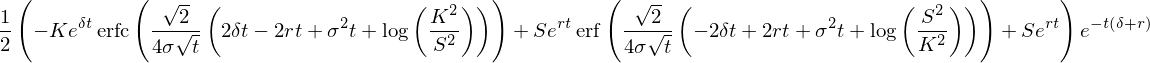

In [6]:
A.subs(a,ibound[x]).simplify()

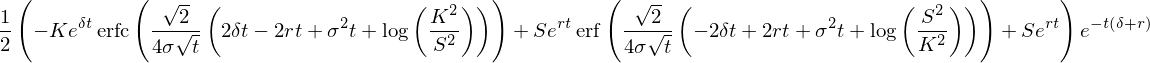

In [7]:
(-K*exp(delta*t)*erfc(sqrt(2)*(2*delta*t - 2*r*t + sigma**2*t + log(K**2/S**2))/(4*sigma*sqrt(t))) + S*exp(r*t)*erf(sqrt(2)*(-2*delta*t + 2*r*t + sigma**2*t + log(S**2/K**2))/(4*sigma*sqrt(t))) + S*exp(r*t))*exp(-t*(delta + r))/2

##### Note: ${\rm erfc}(x)=1-{\rm erf}(x)=1+{\rm erf}(-x)$.

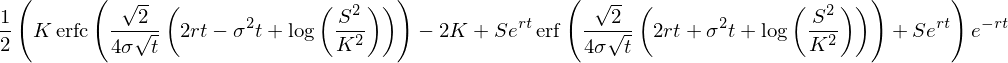

In [8]:
A.subs(a,ibound[x]).subs(delta,0).simplify()

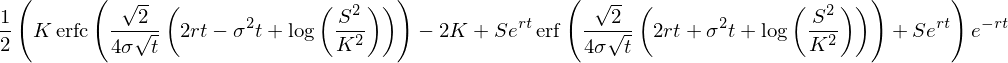

In [9]:
(K*erfc(sqrt(2)*(2*r*t - sigma**2*t + log(S**2/K**2))/(4*sigma*sqrt(t))) - 2*K + S*exp(r*t)*erf(sqrt(2)*(2*r*t + sigma**2*t + log(S**2/K**2))/(4*sigma*sqrt(t))) + S*exp(r*t))*exp(-r*t)/2

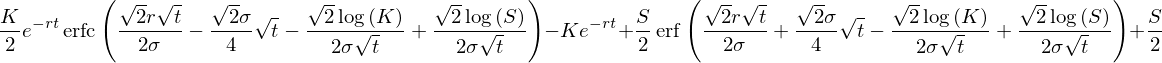

In [10]:
A.subs(a,ibound[x]).subs(delta,0).simplify().expand()